# **Machine Learning Tutorial: FAMU-FSU COE Visit**
**Tools:** Analysis will be done in python, using a number of useful open source packages commonly used for data science tasks:

* **Numpy** Python's scientific computing package. http://www.numpy.org/
* **Pandas** A very useful data analysis and manipulation package http://pandas.pydata.org/
* **Scikit-learn** A comprehensive machine learning library http://scikit-learn.org/stable/
* **Matplotlib** Package for creating charts and other visualizations https://matplotlib.org/

All these packages come bundled as part of the Anaconda python distribution. Install Anaconda for the simplest way to get all dependancies for the tutorial: **Anaconda** https://www.anaconda.com/download/

## **Running the notebook:**

This notebook contains different cells containing executable code. You can run the code in each cell below by clicking on the cell and using the run button in the toolbar above, or using ctrl+enter or shift+enter

The output from the code (or an error!) will appear below the cell when you run it. Here is more info on using Jupyter Notebooks.

Let's get started by importing the libraries we will use.

In [138]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **Overview**

This tutorial 

The datasets consists of 4 features describing 3 types, or classes, of the iris plant. 

You can find the dataset at the following link: https://archive.ics.uci.edu/ml/datasets/Iris

The tutorial will proceed with the following tasks:

**Step 1: Data Preparation**

* First, the data needs to be cleaned and preprocessed. 

**Step 2: Data Exploration**

* Second, we will plot the data to visualize how the classes are group. 

**Step 3: Prediction of Iris Plants**

* Third, we will choose an algorithm to model the data set and then use the model to predict on new observations.

**Step 4: Metrics to Analyze Results**

* Lastly, we will use different metrics to understand how well the model performs. 

## **Steps 1 & 2: Data Preparation/Exploration**
First, import the Iris dataset. Typically, you must clean the data set by analyzing instances or features that may need to be removed; however, this data set is "perfect" - no missing values and good ratio between features and number of instances. Based on the visualization, it is shown that one of the classes is linearly separable from the other 2 classes, but 2 of the classes are not linearly separable. This is analysis is helpful when determining which algorithm we want to choose to classify this data set.

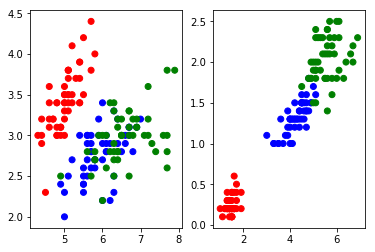

In [139]:
#Import Iris Data Set
data = pd.read_csv('iris.csv',header=None)

data = data.as_matrix()
ncolumns = len(data[1]) - 1

data[:,ncolumns] = pd.factorize(data[:,ncolumns])[0]
data[:,ncolumns] = data[:,ncolumns].astype(int)

#Visualization of the Data Set
plt.subplot(121)
plt.scatter(data[:,0],data[:,1],c=data[:,ncolumns],cmap=matplotlib.colors.ListedColormap(['red','blue','green']))

plt.subplot(122)
plt.scatter(data[:,2],data[:,3],c=data[:,ncolumns],cmap=matplotlib.colors.ListedColormap(['red','blue','green']))

## **Step 3 - Prediction of Iris Plants**
First, we need to split the data set into a training and test set. If we use the entire data set to build the machine learning mdoel, our accuracy will not be indicative of classifying new observations. Therefore, we will conduct a 70-30 train-test split on the data. 

**Note: In machine learning, researchers may do different splits - 50/50, 80/20, 90/10, etc. - depending on the data or area of research**

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data,data[:,ncolumns].astype(int),test_size=0.3)
print(y_train)


[1 1 2 2 2 0 0 0 2 0 1 2 1 1 2 2 2 0 0 2 2 1 2 0 0 0 0 2 2 1 1 2 1 2 1 1 0
 1 0 1 1 2 0 2 2 0 2 2 1 2 1 2 1 1 1 1 0 0 0 0 0 2 1 2 0 1 2 0 0 0 0 2 0 0
 1 0 2 1 0 1 1 2 1 0 0 1 0 0 1 0 1 1 1 0 2 1 1 2 1 1 2 0 2 2 0]


We are going to you the k-Nearest Neighbors (kNN) algorithm to predict the type of iris plant. We will use **k=3 (find 3 nearest neighbors)** and the **Euclidean** metric to compute the distance. 

In [141]:
#k-Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

#Create the model with the training set
neigh.fit(X_train,y_train)

#Predict the class of each instance in the test set
y_predicted = neigh.predict(X_test)

## **Step 4 - Metrics to Analyze Classification **
After predict the class for each instance, the confusion matrix is computed, along with the overall accuracy.
Based on the results, we see that kNN model was able to efficiently classify all instances of the test set. The class-specific accuracies were 100% for each class as well. 

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_predicted))
print('Accuracy: ', accuracy_score(y_test,y_predicted)*100, '%')

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]
Accuracy:  100.0 %
